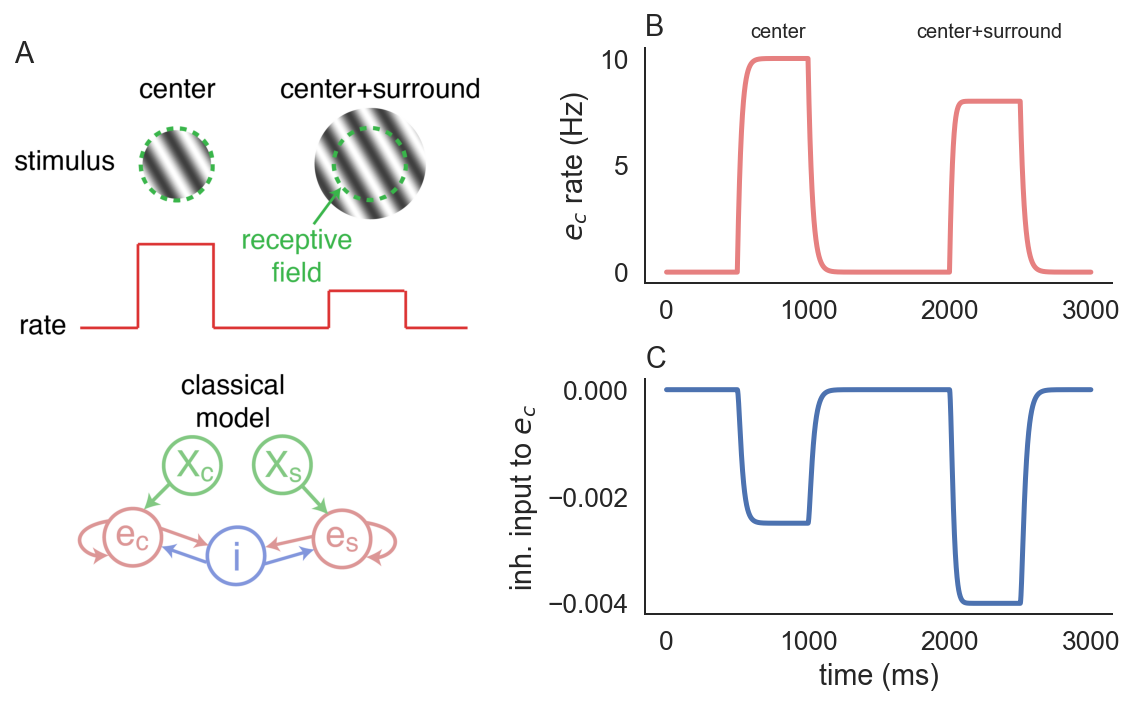

In [1]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')
%config InlineBackend.figure_format = 'retina'

# Keep this set to false unless you want to save figures and data
# (in which case you'll need to change some directories below)
SaveFigures=True
###############################################
###############################################

### First do the classical model

# Discretized time
T=3000
dt=.5
time=np.arange(0,T,dt)

# Define network params. 
# The w's are dimensionless
# Let's interpret time in ms
# and r in 1/ms=kHz.
wee=.25
wei=-.5
wie=.5
wii=0
Xe=10/1000
Xi=0/1000
taue=30
taui=10

# Build matrix and vector forms
W=np.array([[wee,0,wei],[0,wee,wei],[wie,wie,wii]])
X=np.zeros((3,len(time)))
tau=np.array([taue,taue,taui])

# The times at which each stimulus turn on/off
tCenterOn=500
tCenterOff=1000
tSurrOn=2000
tSurrOff=2500

# Make stimulus
C=np.zeros(len(time))
S=np.zeros(len(time))
C[int(tCenterOn/dt):int(tCenterOff/dt)]=1
C[int(tSurrOn/dt):int(tSurrOff/dt)]=1
S[int(tSurrOn/dt):int(tSurrOff/dt)]=1
X[0,:]=C*Xe
X[1,:]=S*Xe

# Define f-I curve
def f(I):
    return (I)*(I>0)

# Euler loop
r=np.zeros((3,len(time)))
for i in range(len(time)-1):
    r[:,i+1]=r[:,i]+dt*(-r[:,i]+f(W@r[:,i]+X[:,i]))/tau




# Make figure
plt.subplots(figsize=(8,5))

# Get image for plot
plt.subplot(1,2,1)
if 'google.colab' in str(get_ipython()):
    url = "https://raw.githubusercontent.com/RobertRosenbaum/ModelingNeuralCircuits/master/CodeFromBook/ImageFiles/SurroundSuppDiagram1.png"
    file = np.DataSource().open(url)
    im = plt.imread(file.name)
else:
    im = plt.imread('./ImageFiles/SurroundSuppDiagram1B-01.png')
plt.imshow(im,interpolation='hanning')
plt.axis('off')
plt.title('A',loc='left')


plt.subplot(2,2,2)
plt.plot(time,1000*r[0,:],color=[.9,.5,.5])
plt.text((tCenterOn+tCenterOff)/2+35,11,"center",ha='center')
plt.text((tSurrOn+tSurrOff)/2+35,11,"center+surround",ha='center')
#plt.xlabel('time (ms)')
plt.ylabel(r'$e_c$ rate (Hz)')
plt.title('B',loc='left')
sns.despine()

plt.subplot(2,2,4)
plt.plot(time,wei*r[2,:],'b')
plt.xlabel('time (ms)')
plt.ylabel(r'inh. input to $e_c$')
plt.title('C',loc='left')
sns.despine()

plt.tight_layout()


# Save figure if needed
if SaveFigures:
      plt.savefig('../Figures/SurroundSuppression1B.pdf')





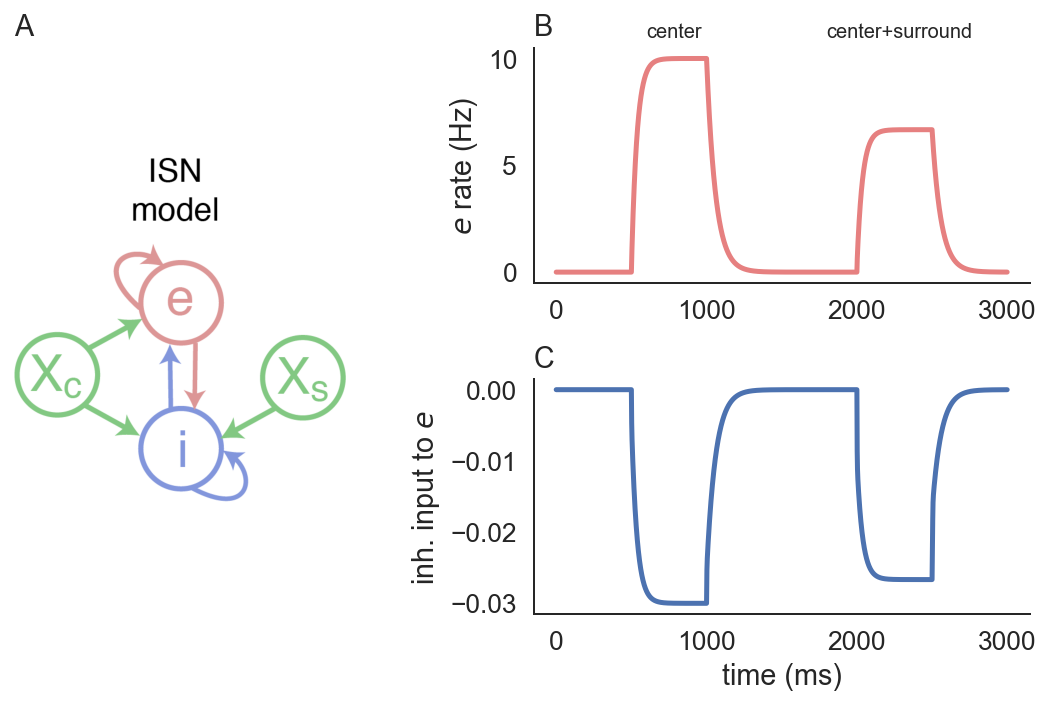

In [2]:
##### Now do the ISN model


# Define network params. 
# The w's are dimensionless
# Let's interpret time in ms
# and r in 1/ms=kHz.
wee=2
wei=-4
wie=5
wii=-7
Xe=20/1000
Xi=10/1000
taue=60
taui=12

# Build matrix and vector forms
W=np.array([[wee,wei],[wie,wii]])
X=np.zeros((2,len(time)))
tau=np.array([taue,taui])


# The times at which each stimulus turn on/off
tCenterOn=500
tCenterOff=1000
tSurrOn=2000
tSurrOff=2500

# Make stimulus
C=np.zeros(len(time))
S=np.zeros(len(time))
C[int(tCenterOn/dt):int(tCenterOff/dt)]=1
C[int(tSurrOn/dt):int(tSurrOff/dt)]=1
S[int(tSurrOn/dt):int(tSurrOff/dt)]=1
X[0,:]=C*Xe
X[1,:]=C*Xi+S*Xi

# Define f-I curve
def f(I):
    return (I)*(I>0)

# Euler loop
r=np.zeros((2,len(time)))
for i in range(len(time)-1):
    r[:,i+1]=r[:,i]+dt*(-r[:,i]+f(W@r[:,i]+X[:,i]))/tau

    

    
# Make figure
plt.subplots(figsize=(8,5))

# Get image for plot
plt.subplot(1,2,1)
if 'google.colab' in str(get_ipython()):
    url = "https://raw.githubusercontent.com/RobertRosenbaum/ModelingNeuralCircuits/master/CodeFromBook/ImageFiles/SurroundSuppDiagram2.png"
    file = np.DataSource().open(url)
    im = plt.imread(file.name)
else:
    im = plt.imread('./ImageFiles/SurroundSuppDiagram2.png')
plt.imshow(im,interpolation='hanning')
plt.axis('off')
plt.title('A',loc='left')



plt.subplot(2,2,2)
plt.plot(time,1000*r[0,:],color=[.9,.5,.5])
plt.text((tCenterOn+tCenterOff)/2+35,11,"center",ha='center')
plt.text((tSurrOn+tSurrOff)/2+35,11,"center+surround",ha='center')
#plt.xlabel('time (ms)')
plt.ylabel(r'$e$ rate (Hz)')
plt.title('B',loc='left')
sns.despine()

plt.subplot(2,2,4)
plt.plot(time,wei*r[1,:],'b')
plt.xlabel('time (ms)')
plt.ylabel(r'inh. input to $e$')
plt.title('C',loc='left')
sns.despine()



plt.tight_layout()

# Save figure if needed
if SaveFigures:
      plt.savefig('../Figures/SurroundSuppression2.pdf')



In [ ]:
# #### THIS WORKS!


# import numpy as np
# import matplotlib.pyplot as plt

# fig0,ax0=plt.subplots(2,1)
# ax0[0].plot(np.array([1,2,3]),np.array([1,2,3]))
# ax0[1].plot(np.array([1,2,3]),2*np.array([1,2,3]))
# fig0.tight_layout()
# fig0.savefig("temp.svg",format='svg')


# import svgutils.transform as sg
# import sys 

# #create new SVG figure
# fig = sg.SVGFigure("320cm", "6.5cm")

# # # load matpotlib-generated figures
# fig1 = sg.fromfile('temp.svg')
# # fig2 = sg.fromfile('temp.svg')

# fig2=sg.from_mpl(fig0)

# # get the plot objects
# plot1 = fig1.getroot()
# plot2 = fig2.getroot()
# plot2.moveto(280, 0)

# # add text labels
# txt1 = sg.TextElement(25,20, "A", size=12, weight="bold")
# txt2 = sg.TextElement(305,20, "B", size=12, weight="bold")

# # append plots and labels to figure
# fig.append([plot1, plot2])
# fig.append([txt1, txt2])

# # save generated SVG files
# fig.save("fig_final.svg")


In [195]:

# #%pip install svgutils==0.3.4
# #%pip install svglib




# #fig1.savefig('../Figures/temp.svg',format='svg')

# #F1=svgutils.compose.Figure("16cm", "6.5cm",svgutils.compose.Panel())


# #svgfig1 = svgutils.transform.from_mpl(fig1)
# #svgfig1.getroot()
# #svgutils.compose.Figure("16cm", "6.5cm"

# #svgutils.compose.Panel(svgfig1)

# # import numpy as np
# # import matplotlib.pyplot as plt
# # from svgutils.compose import *

# # fig0,ax0=plt.subplots(2,1)
# # ax0[0].plot(np.array([1,2,3]),np.array([1,2,3]))
# # ax0[1].plot(np.array([1,2,3]),2*np.array([1,2,3]))
# # fig0.tight_layout()

# # plot0=MplFigure(fig0)
# # F1=Figure("2cm", "2cm",Panel(plot0),Panel(SVG("temp.svg"))).save('test.svg')



# import numpy as np
# import matplotlib.pyplot as plt
# from svgutils.compose import *

# fig0,ax0=plt.subplots(2,1)
# ax0[0].plot(np.array([1,2,3]),np.array([1,2,3]))
# ax0[1].plot(np.array([1,2,3]),2*np.array([1,2,3]))
# fig0.tight_layout()
# fig0.savefig("temp.svg",format='svg')

# F1=Figure("100cm", "100cm",Panel(SVG("tempfile.svg")).scale(0.405).move(0,0)).save('test.svg')


# # from svglib.svglib import svg2rlg
# # from reportlab.graphics import renderPDF

# # drawing = svg2rlg("test.svg")
# # renderPDF.drawToFile(drawing, "test.pdf")


# # fig0.savefig("temp.svg",format='svg')
# # F1=svgutils.compose.Figure("100cm", "100cm",svgutils.compose.Panel(svgutils.compose.SVG("temp.svg"))).save('test2.svg')


# # drawing = svg2rlg("test2.svg")
# # renderPDF.drawToFile(drawing, "test2.pdf")

# #F1=svgutils.compose.Figure("10cm", "10cm",svgutils.compose.Panel(svgutils.compose.MplFigure(fig0))).save('test.svg')

# #svgfig1 = svgutils.transform.from_mpl(fig1)
# #svgfig1 = svgutils.compose.MplFigure(fig1)
# #svgfig1.getroot()

# #F1=svgutils.compose.Figure("16cm", "6.5cm",svgutils.compose.Panel(svgutils.compose.SVG(svgfig1.tostr())))

# #         Panel(
# #               SVG("sigmoid_fit.svg"),
# #               Text("A", 25, 20, size=12, weight='bold')
# #              ),
# #         Panel(
# #               SVG("anscombe.svg").scale(0.5),
# #               Text("B", 25, 20, size=12, weight='bold')
# #              ).move(280, 0)
# #         ).save("fig_final_compose.svg")

In [196]:
# drawing = svg2rlg("tempfile.eps")
# renderPDF.drawToFile(drawing, "tempfile.svg")

# temp=SVG('tempfile.svg')
####


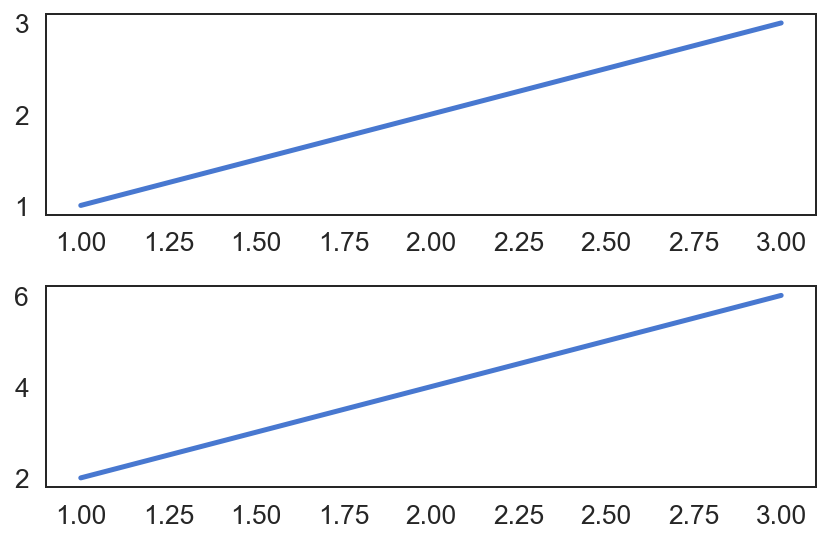

In [203]:
# #### THIS WORKS


# import numpy as np
# import matplotlib.pyplot as plt

# fig0,ax0=plt.subplots(2,1)
# ax0[0].plot(np.array([1,2,3]),np.array([1,2,3]))
# ax0[1].plot(np.array([1,2,3]),2*np.array([1,2,3]))
# fig0.tight_layout()
# fig0.savefig("temp.svg",format='svg')


# import svgutils.transform as sg
# import sys 

# #create new SVG figure
# fig = sg.SVGFigure("320cm", "6.5cm")

# # # load matpotlib-generated figures
# fig1 = sg.fromfile('temp.svg')
# # fig2 = sg.fromfile('temp.svg')

# fig2=sg.from_mpl(fig0)

# # get the plot objects
# plot1 = fig1.getroot()
# plot2 = fig2.getroot()
# plot2.moveto(280, 0)

# # add text labels
# txt1 = sg.TextElement(25,20, "A", size=12, weight="bold")
# txt2 = sg.TextElement(305,20, "B", size=12, weight="bold")

# # append plots and labels to figure
# fig.append([plot1, plot2])
# fig.append([txt1, txt2])

# # save generated SVG files
# fig.save("fig_final.svg")


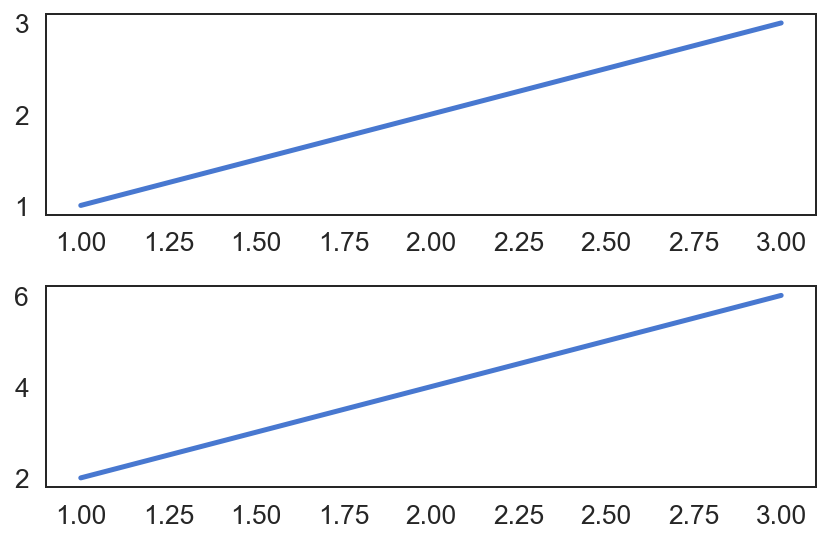

In [202]:


# import svgutils.transform as sg
# import sys 


# #create new SVG figure
# fig = sg.SVGFigure("16cm", "6.5cm")

# # load matpotlib-generated figures
# fig1 = sg.fromfile('temp.svg')
# fig2 = sg.fromfile('temp.svg')

# # # get the plot objects
# # plot1 = fig1.getroot()
# # plot2 = fig2.getroot()
# # plot2.moveto(280, 0)


# # # append plots and labels to figure
# # fig.append([plot1, plot2])
# # fig.append([txt1, txt2])

# # # save generated SVG files
# # fig.save("fig_final.svg")


# # from svglib.svglib import svg2rlg
# # from reportlab.graphics import renderPDF

# # drawing = svg2rlg("fig_final.svg")
# # renderPDF.drawToFile(drawing, "fig_final.eps")


In [ ]:
# import svgutils.transform as sg
# import sys 

# #create new SVG figure
# fig = sg.SVGFigure("16cm", "6.5cm")

# # load matpotlib-generated figures
# fig1 = sg.fromfile('sigmoid_fit.svg')
# fig2 = sg.fromfile('anscombe.svg')

# # get the plot objects
# plot1 = fig1.getroot()
# plot2 = fig2.getroot()
# plot2.moveto(280, 0, scale=0.5)

# # add text labels
# txt1 = sg.TextElement(25,20, "A", size=12, weight="bold")
# txt2 = sg.TextElement(305,20, "B", size=12, weight="bold")

# # append plots and labels to figure
# fig.append([plot1, plot2])
# fig.append([txt1, txt2])

# # save generated SVG files
# fig.save("fig_final.svg")